In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
total_emails = pd.read_pickle("/Users/nus/twenty-years-of-bldgsim-textmining/total_email_data.pkl")

In [3]:
word_freq = pd.read_csv("/Users/nus/twenty-years-of-bldgsim-textmining/word_frequency_tagged_10_10.csv")

In [4]:
total_emails.Body = total_emails.Body.astype("U")

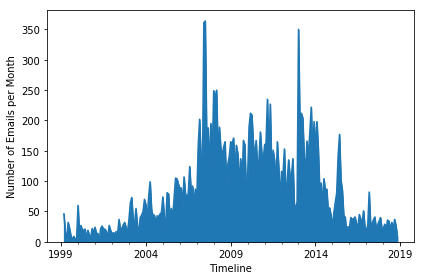

In [5]:
fig = plt.figure()
ax = total_emails.Body.resample("M").count().plot.area()
ax.set(ylabel="Number of Emails per Month", xlabel="Timeline")
plt.tight_layout()
plt.savefig("/Users/nus/twenty-years-of-bldgsim-textmining/figures/email_volume.pdf")

In [6]:
email_length = total_emails.Body.apply(lambda x: len(x))

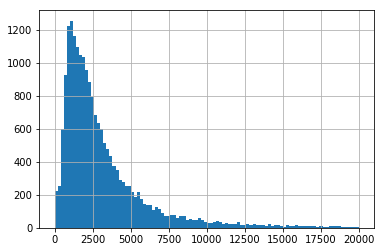

In [7]:
email_length[email_length<20000].hist(bins=100)

In [8]:
word_freq.head(20)

,Label,Word,Frequency
0,Concept,leed,24
1,Software,energyplus,20
2,System,cooling,20
3,Organization,ashrae,18
4,None,heat,18
5,Concept,weather,18
6,Software,equest,17
7,General,performance,16
8,General,software,16
9,None,air,15


In [9]:
total_emails.Body.iloc[1].count("Bradley")

1

In [10]:
def get_topic_metrics(word, body):
    word_count = 0
    word_count += body.count(word)
    word_count += body.count(str.capitalize(word))
    word_count += body.count(str.upper(word))
    return word_count

In [11]:
leed = total_emails.Body.apply(lambda x: get_topic_metrics("leed",x))

In [12]:
#leed

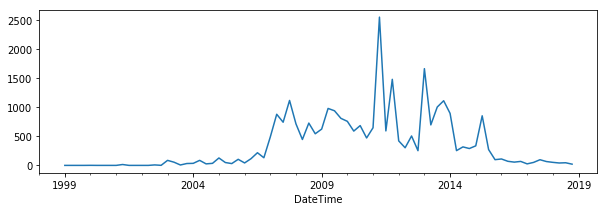

In [13]:
leed.resample("Q").sum().plot(figsize=(10,3))

In [14]:
word_freq.Label.value_counts()

None            516
General         171
FirstName        22
LastName         16
Concept          15
Company          12
Interesting      11
Software          9
System            8
Organization      8
HVAC              7
Event             7
Envelope          7
Load              6
Training          6
Career            5
Equipment         5
Name: Label, dtype: int64

In [15]:
word_freq.head(10)

,Label,Word,Frequency
0,Concept,leed,24
1,Software,energyplus,20
2,System,cooling,20
3,Organization,ashrae,18
4,None,heat,18
5,Concept,weather,18
6,Software,equest,17
7,General,performance,16
8,General,software,16
9,None,air,15


In [16]:
word_freq.index = word_freq.Word

<Figure size 432x288 with 0 Axes>

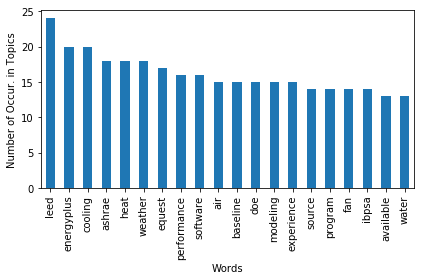

In [17]:
fig = plt.figure()
ax = word_freq.head(20).plot(kind="bar") #, hue="Label"
ax.set(ylabel="Number of Occur. in Topics", xlabel="Words")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("word_freq.pdf")

In [18]:
#categories = ["Training","HVAC","Organization","Interesting","Company","Weather","Software","LastName","Airside"]

In [19]:
categories = word_freq.Label.unique()

In [20]:
list(categories)

['Concept',
 'Software',
 'System',
 'Organization',
 'None',
 'General',
 'Career',
 'Equipment',
 'Training',
 'Event',
 'FirstName',
 'Load',
 'Company',
 'Envelope',
 'LastName',
 'HVAC',
 'Interesting']

In [21]:
categories = ['Concept',
 'Software',
 'System',
 'Organization',
 'General',
 'Career',
 'Equipment',
 'Training',
 'Event',
 'FirstName',
 'Load',
 'Company',
 'Envelope',
 'LastName',
 'HVAC',
 'Interesting']

In [22]:
list(word_freq[word_freq.Label == "Training"].head().Word)

['training', 'webinar', 'certification', 'gototraining', 'forum']

Concept


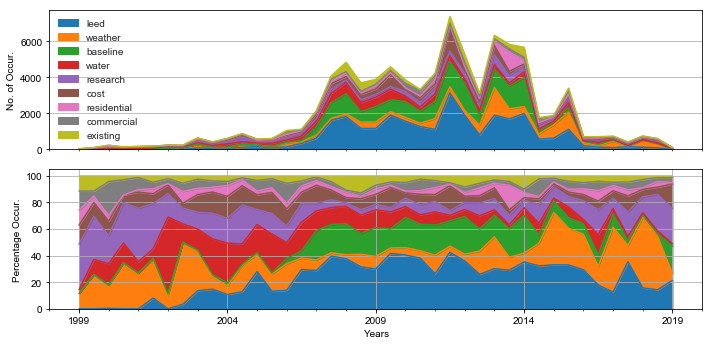

Software


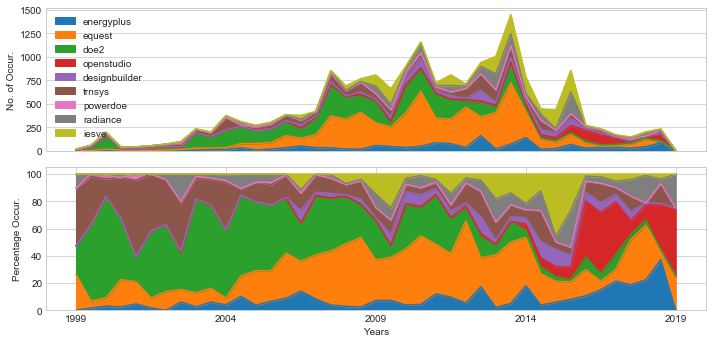

System


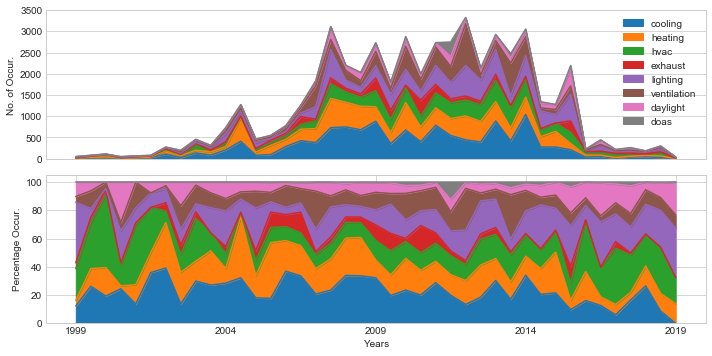

Organization


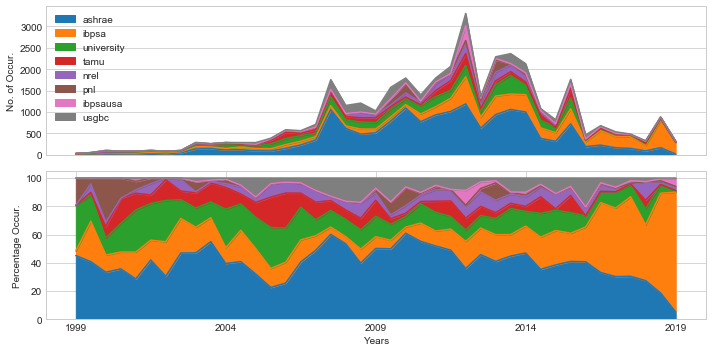

General


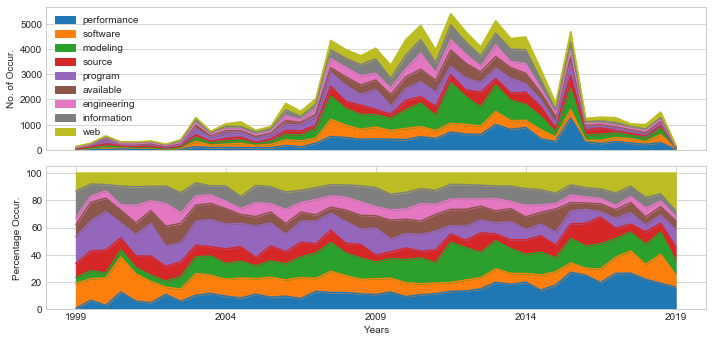

Career


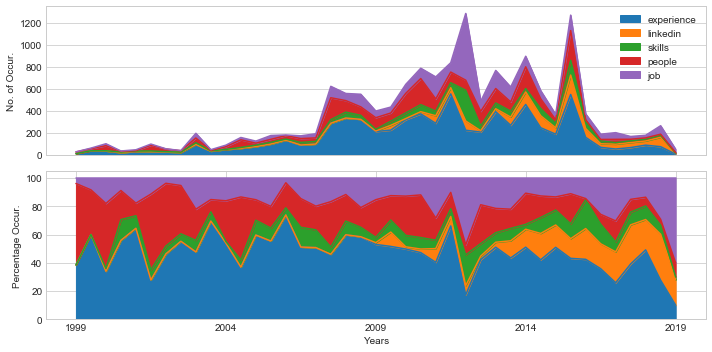

Equipment


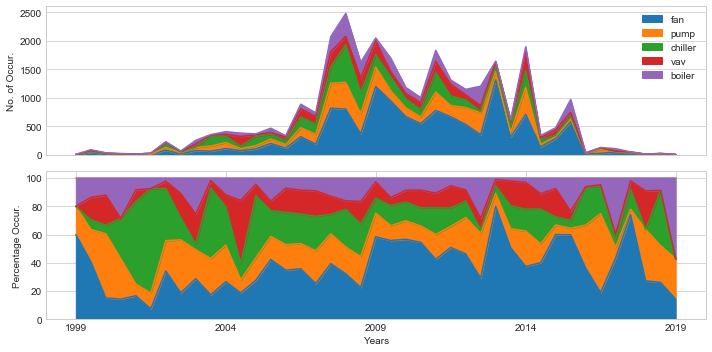

Training


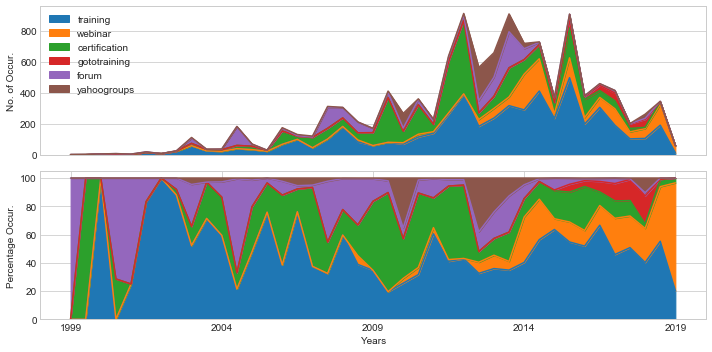

Event


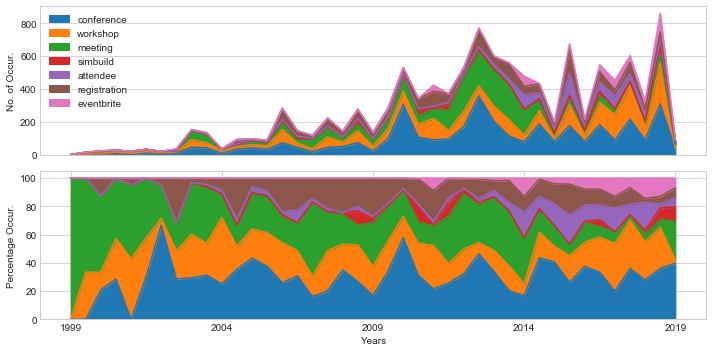

FirstName


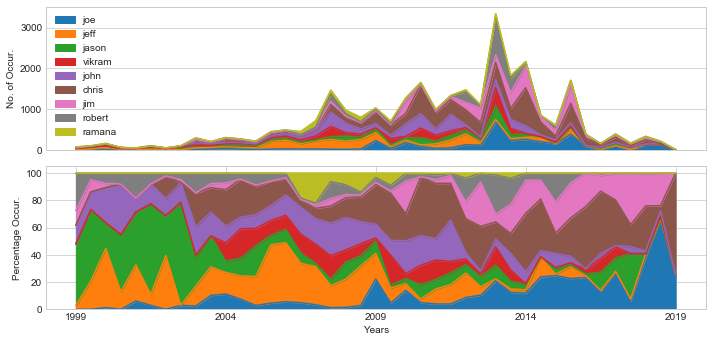

Load


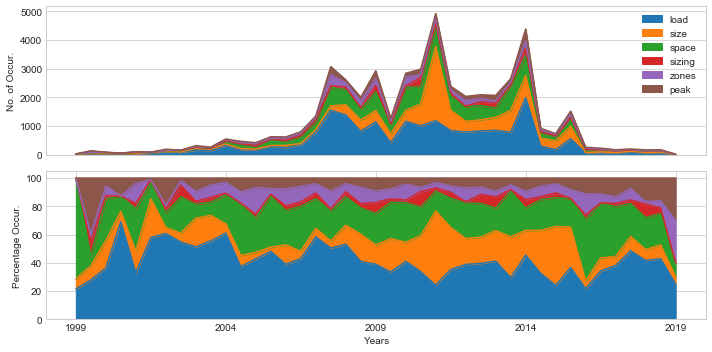

Company


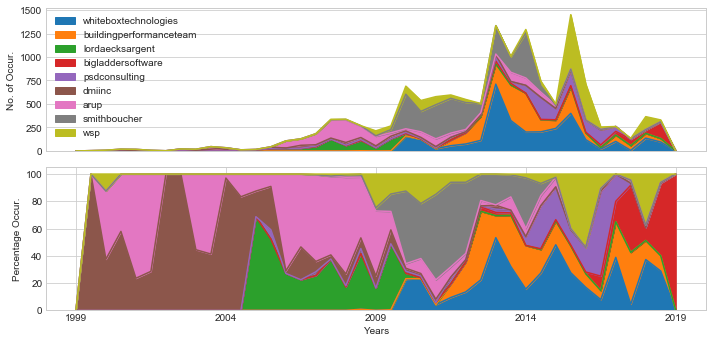

Envelope


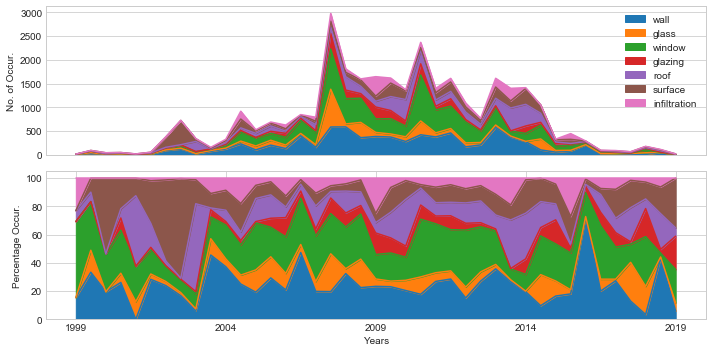

LastName


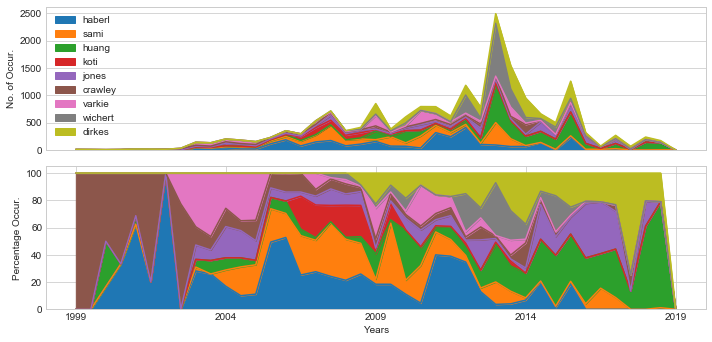

HVAC


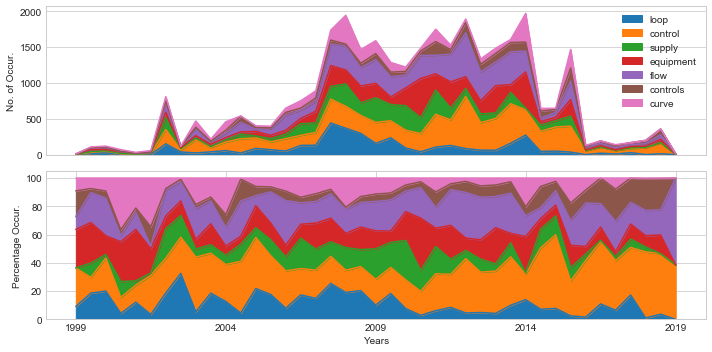

Interesting


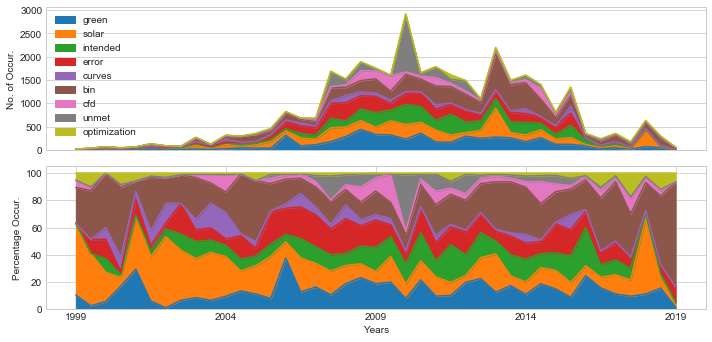

In [23]:
for category in categories:
    print(category)
    df = pd.DataFrame()
    for word in list(word_freq[word_freq.Label == category].head(9).Word):
        #print(word) 
        df[word] = total_emails.Body.apply(lambda x: get_topic_metrics(word, x))
        
    f, axes = plt.subplots(2, 1, figsize=(10,5)) #, sharex='col'
    plt.style.use('seaborn-whitegrid')
    #f.suptitle(category, fontsize=20)
    
    ax1 = df.resample("2Q").sum().plot.area(ax=axes[0])
    ax1.set(ylabel="No. of Occur.", xlabel="", xticks=[])
    #plt.show()
    df_norm = df.resample("2Q").sum().divide(df.resample("2Q").sum().sum(axis=1), axis=0)*100
    ax2 = df_norm.plot.area(ax=axes[1])
    ax2.set(ylabel="Percentage Occur.", xlabel="Years")
    ax2.get_legend().remove()
    
    plt.tight_layout()
    plt.savefig("/Users/nus/twenty-years-of-bldgsim-textmining/figures/"+category+".pdf")
    plt.show()
    #df.resample("A").sum().plot(figsize=(15,4),kind='bar', stacked=True)
    #plt.show()

In [45]:
total_emails.From.value_counts().to_csv("superusers_counts.csv")

In [44]:
#total_emails[total_emails.From.str.contains("balbach")]#.iloc[0].Body

In [35]:
superusers = total_emails.From.value_counts()

In [37]:
superusers.index.str.split("[\\(\\)]")

Index([             [' ncaton at smithboucher.com ', 'Nick Caton', '\n'],
                         [' jglazer at gard.com ', 'Jason Glazer', '\n'],
            [' jim at buildingperformanceteam.com ', 'Jim Dirkes', '\n'],
                    [' VSami at lasarchitect.com ', 'Vikram Sami', '\n'],
            [' yjhuang at whiteboxtechnologies.com ', 'Joe Huang', '\n'],
                  [' kwalkerman at gmail.com ', 'Karen Walkerman', '\n'],
                        [' jra_sac at yahoo.com ', 'John Aulbach', '\n'],
                      [' robert at wichert.org ', 'RobertWichert', '\n'],
                 [' jeffhaberl at tees.tamus.edu ', 'Jeff Haberl', '\n'],
                     [' jaulbach at nexant.com ', 'Aulbach, John', '\n'],
       ...
         ['Sunayana Jain via Bldg-sim <bldg-sim@lists.onebuilding.org>'],
                               [' brad at rer.com ', 'Brad Souza', '\n'],
                [' johnaugustolson at hotmail.com ', 'John Olson', '\n'],
         ['Priyam Tewari vi

In [40]:
names = []
for name in superusers.index.str.split("[\\(\\)]"):
    try:
        names.append(name[1])
    except:
        print(name)

['Joe Huang <yjhuang@whiteboxtechnologies.com>']
['Steven Ayala <sayala81@gmail.com>']
['Performance Network via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Esmond Tresidder via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Steven Ayala via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Aaron Boranian <aaron.boranian@bigladdersoftware.com>']
['Jim Dirkes <jim@buildingperformanceteam.com>']
['Performance Network <workshops@performance.network>']
['Jim Dirkes via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Joe Huang via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Aaron Boranian via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Jason Glazer via Bldg-sim <bldg-sim@lists.onebuilding.org>']
['Sandeep Ahuja <sandeep.ahuja@patternarch.com>']
['Gail Hampsmire <ghampsmire@usgbc.org>']
['Michael Wetter <mwetter@lbl.gov>']
['Chris Yates <chris.malcolm.yates@gmail.com>']
['"arpan.bakshi@performance.network" <arpan.bakshi@performance.network>']
['=?utf-8?Q?Performance=20Systems=20Development?= 

In [41]:
names

['Nick Caton',
 'Jason Glazer',
 'Jim Dirkes',
 'Vikram Sami',
 'Joe Huang',
 'Karen Walkerman',
 'John Aulbach',
 'RobertWichert',
 'Jeff Haberl',
 'Aulbach, John',
 'David S Eldridge',
 'Brandon Nichols',
 'Jeff Haberl',
 'Chris Yates',
 'leen peeters',
 'Chris Jones',
 'Ramana Koti',
 'Carol Gardner',
 'Drury.Crawley at EE.DOE.GOV',
 'Chris Jones',
 'Mike Tillou',
 'James Hansen',
 'Cheney',
 'Varkie C Thomas',
 'Paul Riemer',
 'Gerald Pde',
 'Kevin Kyte',
 'Brian Fountain',
 'Andrew Craig',
 'David Eldridge',
 'Leonard Sciarra',
 'sambhav tiwari',
 'Christian Stalberg',
 'Arpan Bakshi',
 'Keith Swartz',
 'Larry Degelman',
 'Varkie Thomas',
 'Michael Tillou',
 'Fred Porter',
 'Sami, Vikram',
 'David Bradley',
 'Dru.Crawley at bentley.com',
 'Julia Beabout',
 'Chris',
 'Eurek, John S NWO',
 'Graham Carter & Megan Lyall',
 'Bishop, Bill',
 '',
 'Aaron Smith',
 'Bishop, Bill',
 'Marcus Sheffer',
 'Peter Simmonds',
 'Shanta Tucker',
 'Nathan Kegel',
 'Michael J. Witte',
 'JRR',
 'Zoetem

In [43]:
#superuses.index = names

In [30]:
superuses

Nick Caton                     309
Jason Glazer                   275
Jim Dirkes                     205
Vikram Sami                    188
Joe Huang                      183
Karen Walkerman                158
John Aulbach                   155
RobertWichert                  138
Jeff Haberl                    137
Aulbach, John                  134
David S Eldridge               124
Brandon Nichols                122
Jeff Haberl                    114
Chris Yates                    106
leen peeters                    99
Chris Jones                     99
Ramana Koti                     97
Carol Gardner                   90
Drury.Crawley at EE.DOE.GOV     89
Chris Jones                     85
Name: From, dtype: int64

In [51]:
cleaned_super_users = pd.read_csv("superusers_counts_cleanedmanually.csv", header=None)

In [60]:
top20 = cleaned_super_users.groupby(0).sum().sort_values(by=1, ascending=False).head(20)

In [62]:
top20.index.name = "User"
top20.columns = ["Emails"]

In [63]:
top20

,Emails
User,
Nick Caton,309
John Aulbach,289
Jason Glazer,275
Joe Huang,254
Jeff Haberl,251
Vikram Sami,246
Jim Dirkes,205
David Eldridge,192
Drury Crawley,184


In [65]:
top20.to_csv("top20.csv")